# Degerby Proxy

Time series of daily Baltic Sea volume, reconstructed
from  observations  of  sea  surface  elevation  at  tide
gauge Degerby, are available for 9 yr, i.e. 1980 to 1988
(Launiainen & Vihma 1990b). It is well known that sea
level  change  in  the  centre  of  the  Baltic  Sea  (e.g.
Degerby  or  Landsort)  is  representative  of  volume
change,  i.e.  the  mean  sea  level  change  of  the  whole
Baltic Sea (e.g. Jacobsen 1980).

# About GESLA3

We converted height units to metres, the time zone of each record was adjusted to Coordinated Universal Time (UTC).

We did not adjust the frequency of the station records, which in all cases was at least hourly, although several sources have data at higher-frequency (15, 10 or 6 minutes)

We use total water levels from the GESLA-2 
dataset (Tiggeloven 2021)

# Main

In [1]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

from models.random_forest import software

In [3]:
#---
# Initialize
#---
model_run = "rf015"
run_id = 0
season = "winter"
station_names = ["hanko-han-fin-cmems",]
detrend_type = "constant" # "linear"
predictors_of_model = [ # Note!: If prefilling "pf" is used, they have to be always stated after ERA5 predictors
    # ["sp", "tp", "pf"],
    # ["pf",]
]
timelags_of_model = [ # Note!: If pf is used alone as a predictor, timelags need to be in hours instead of days
    # [0, 2, 7], 
    # [7 * 24,]

]
models_path = [
]
percentile = 0.95
clf = RandomForestClassifier

# Build Hyperparameter Grid to optimize from.
#---
n_estimators = [int(x) for x in np.linspace(start = 0, stop = 1000, num = 4)] # Number of trees in random forest
max_depth = [int(x) for x in np.linspace(1, 3, num = 3)] # Maximum number of levels in tree

# max_depth.append(None)
# min_samples_split = [2, 5,] # Minimum number of samples required to split a node
# min_samples_leaf = [1, 2, 4] # Minimum number of samples required at each leaf node
random_state = 0

hparam_grid = {'n_estimators': n_estimators, # hparam grid if optimization is needed
            'max_depth': max_depth,
            # 'min_samples_split': min_samples_split,
            # 'min_samples_leaf': min_samples_leaf,
            'criterion' : ['gini',],
            'random_state' : [random_state,], # To compare results when changing hyperparameters
            'class_weight' : ["balanced",], # “balanced_subsample"
            'oob_score' : [True,],
            }

optimizer = "RandomSearchCV" #"RandomSearchCV"
k = 3
n_iter = 100 
test_size = 0.25
is_optimized = True 
is_scaled = True
is_overlay_importance = True
is_station_name = False 

Load ERA5-Predictor: sp in region: lon-0530_lat7040 for years: 1999-2008 in season: winter
Load Predictand from GESLA
Applied one-hot-encoding with Percentile: 0.95


d:\Programme\miniconda3\envs\mlpy38\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Programme\miniconda3\envs\mlpy38\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Programme\miniconda3\envs\mlpy38\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    self._validate_estimator()
  File "d:\Programme\miniconda3\envs\mlpy38\lib\site-packages\sklearn\ensemble\_base.py", line 138, in _validate_estimator
    raise ValueError(
Va

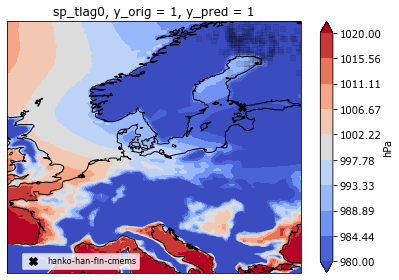

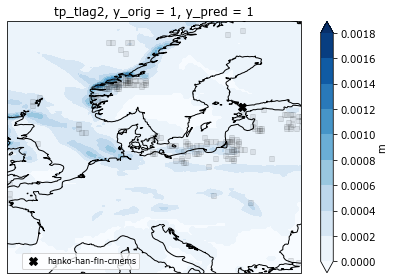

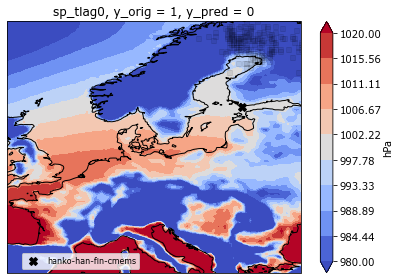

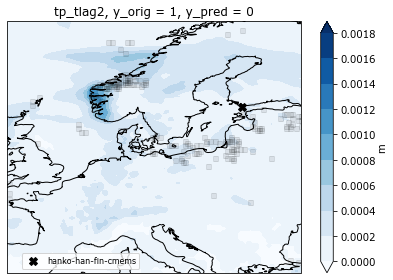

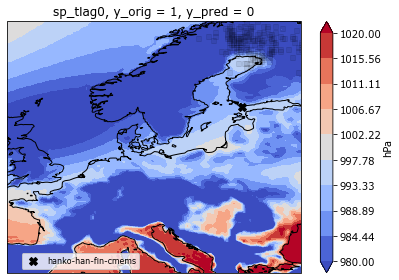

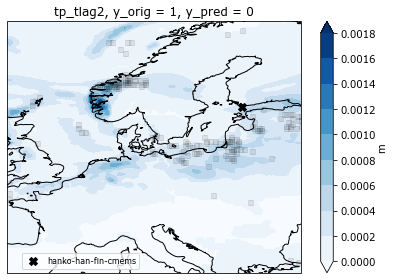

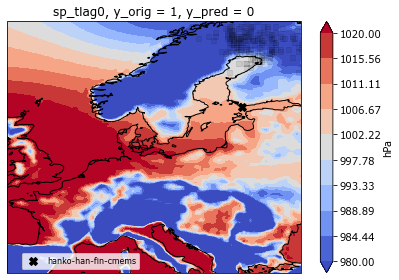

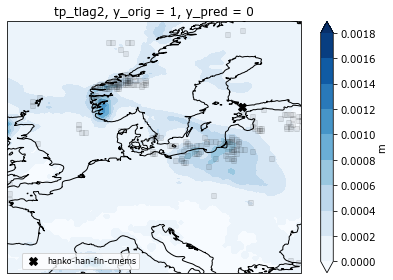

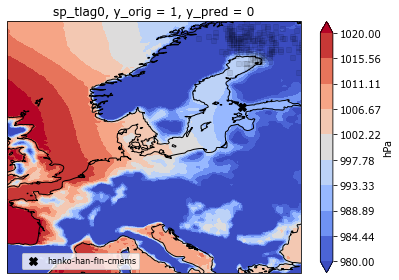

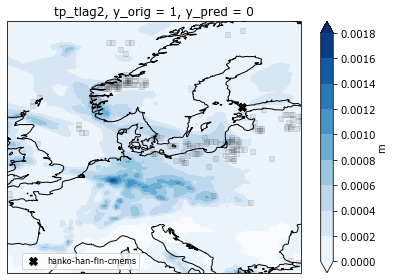

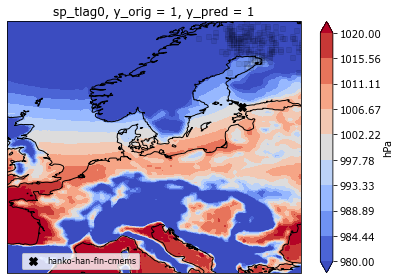

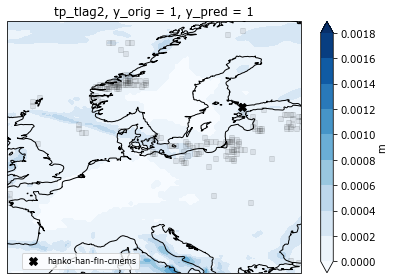

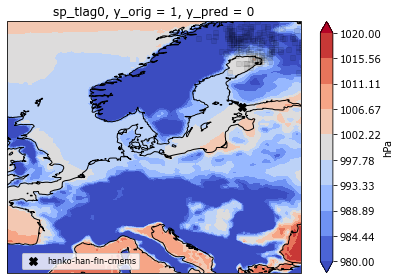

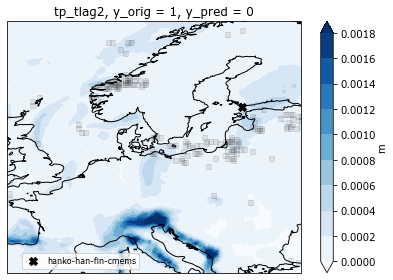

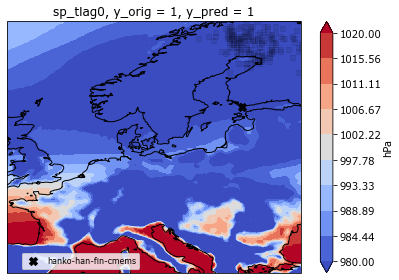

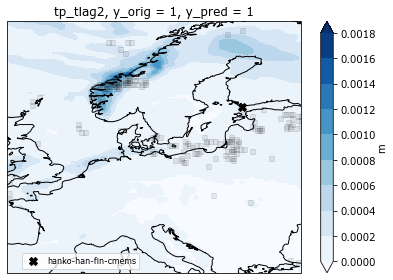

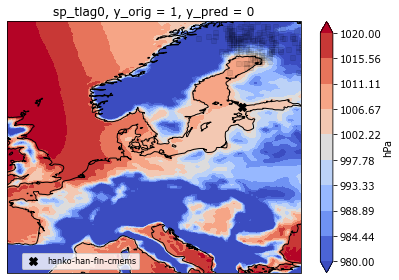

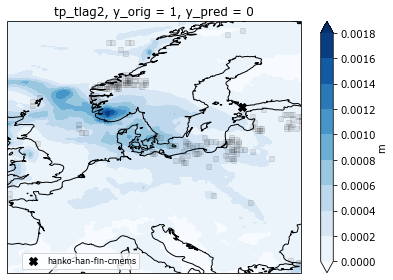

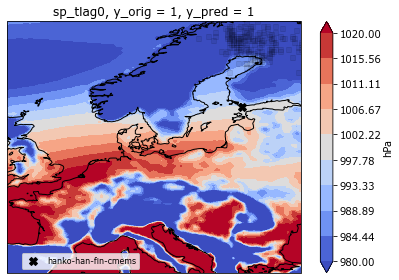

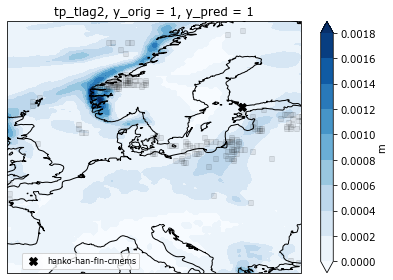

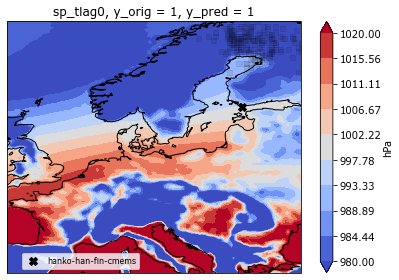

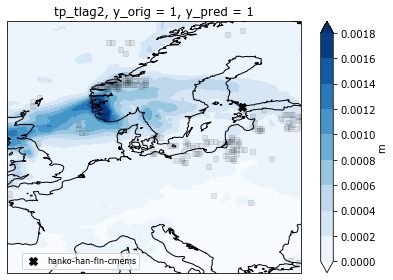

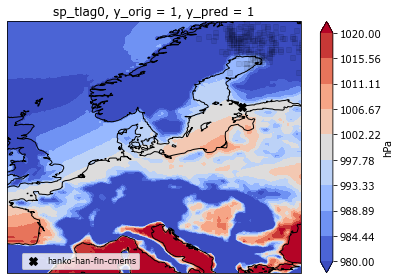

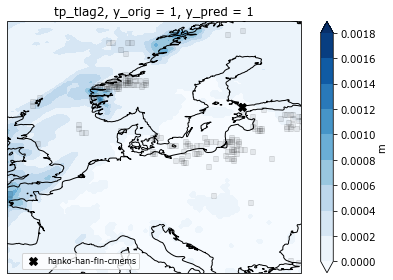

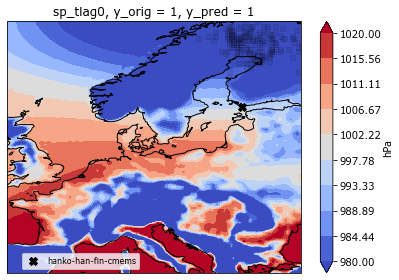

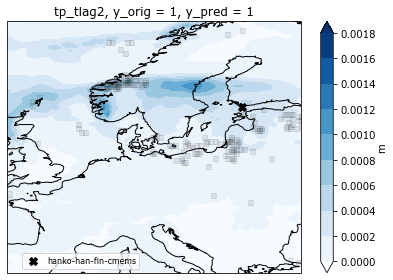

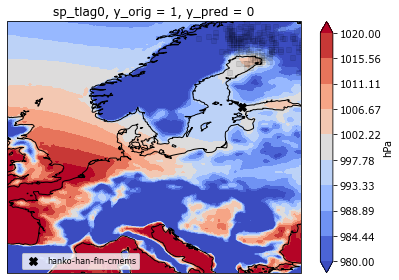

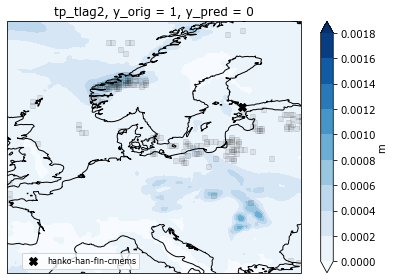

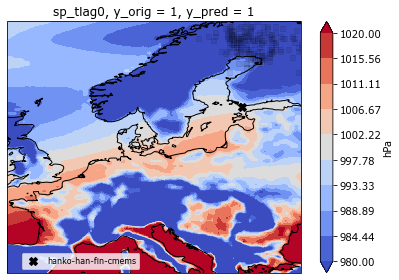

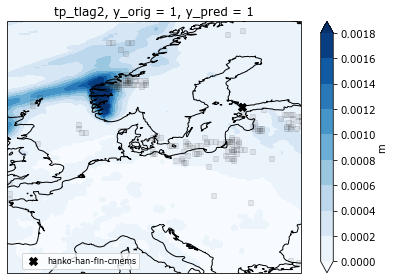

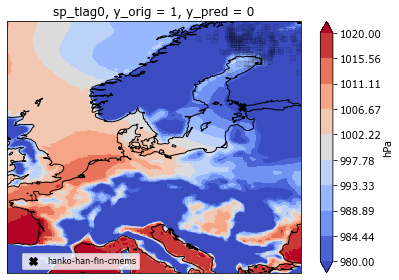

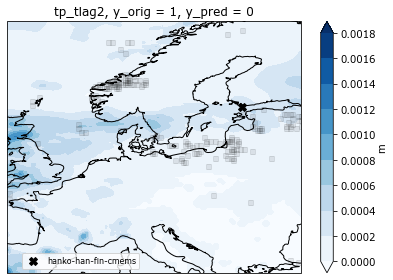

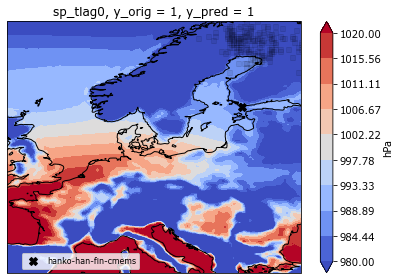

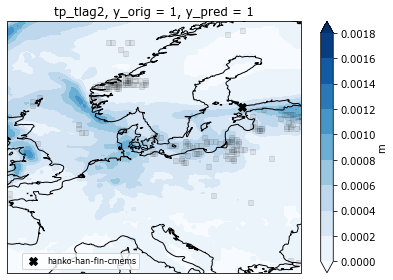

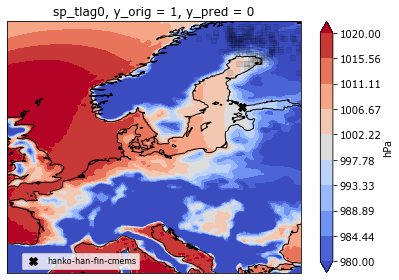

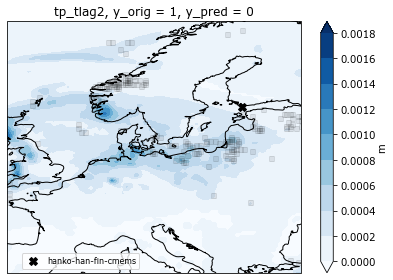

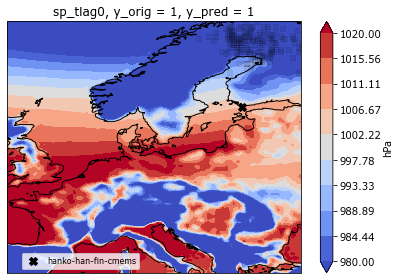

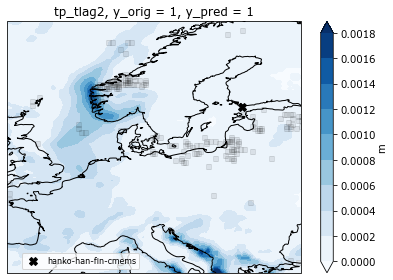

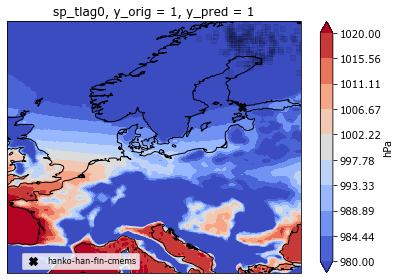

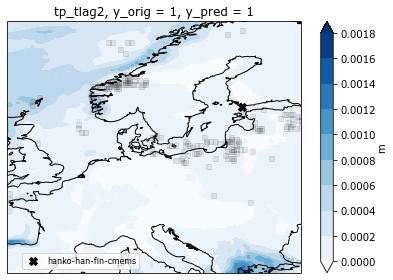

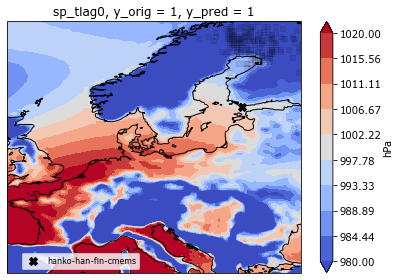

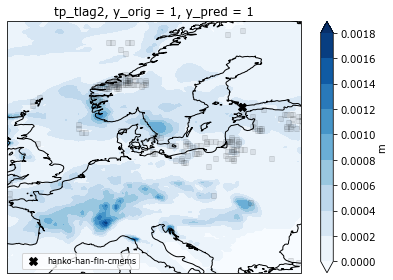

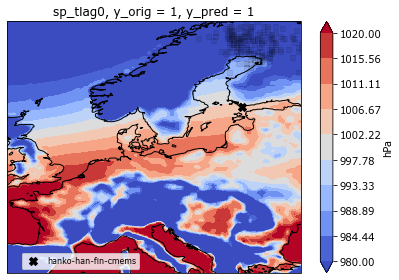

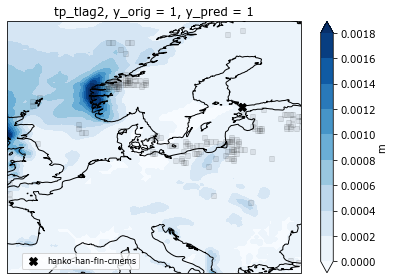

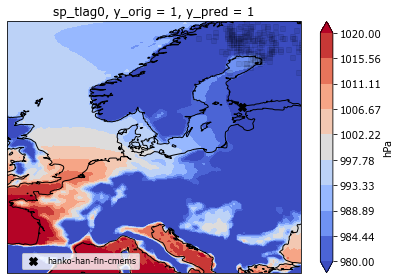

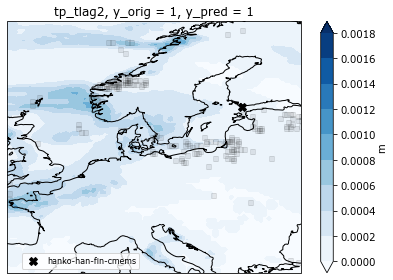

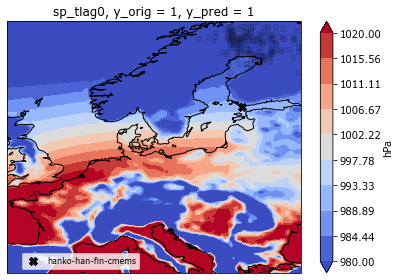

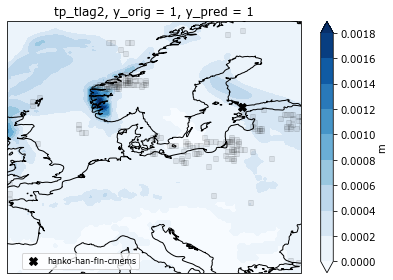

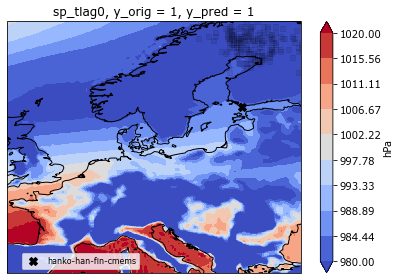

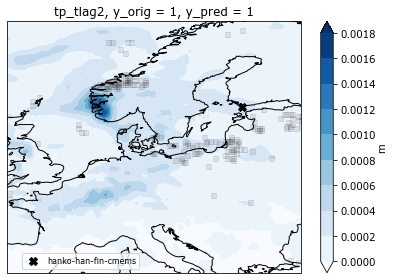

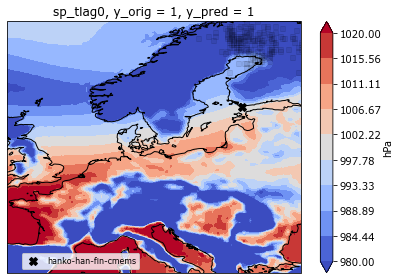

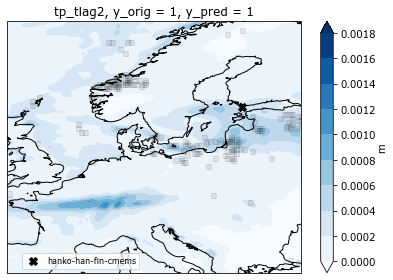

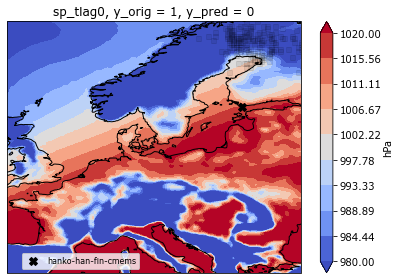

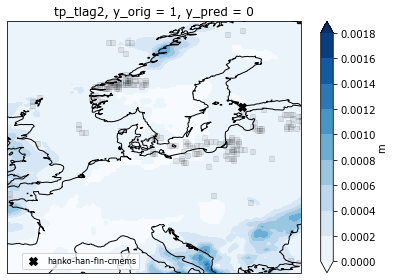

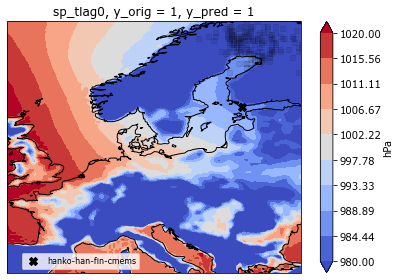

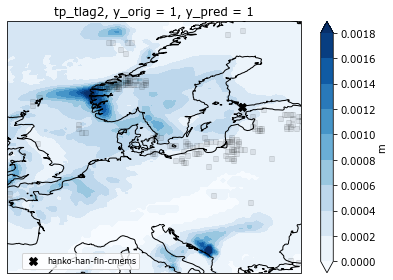

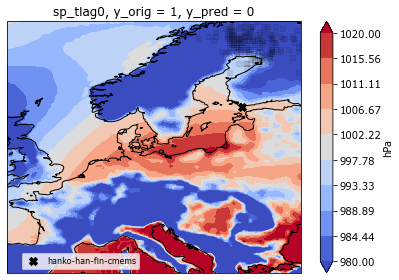

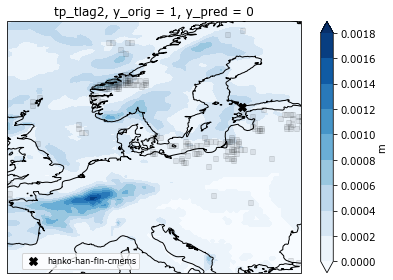

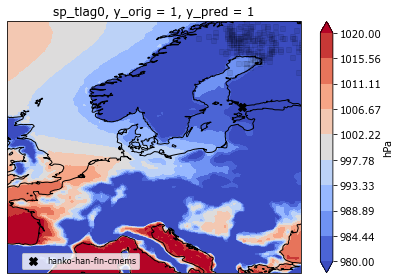

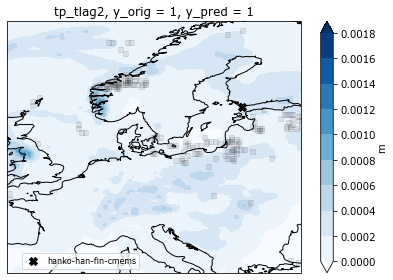

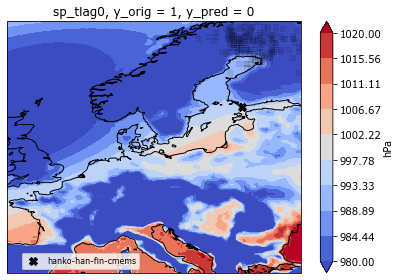

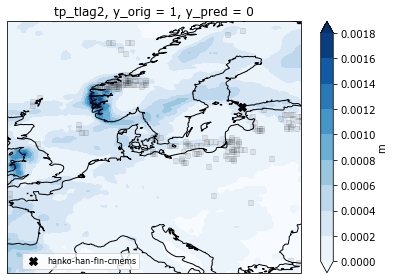

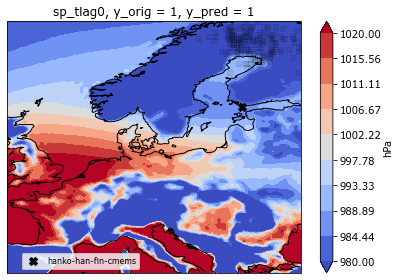

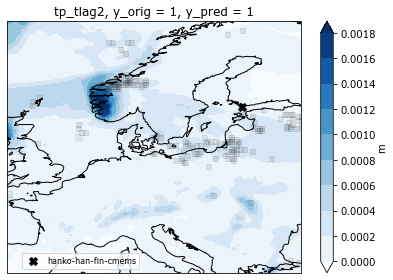

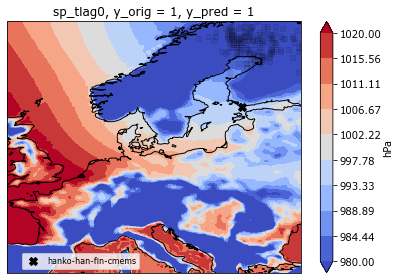

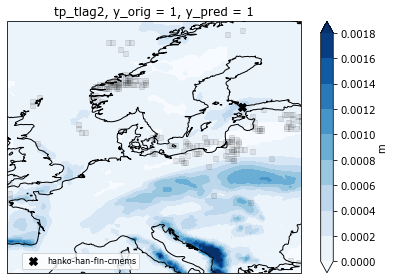

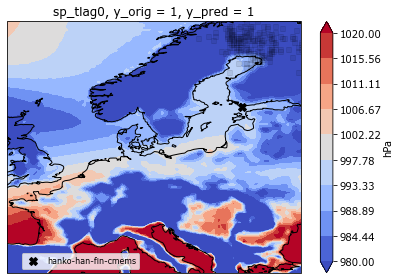

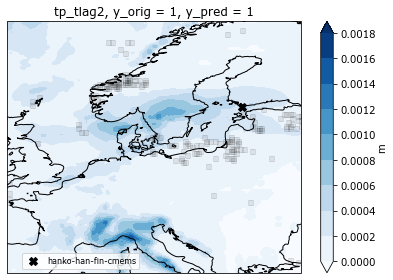

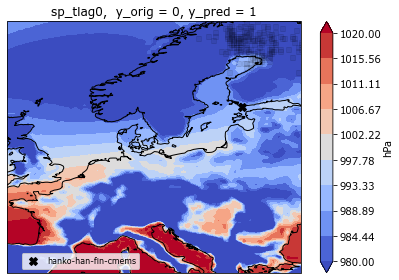

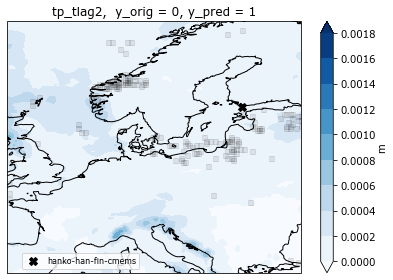

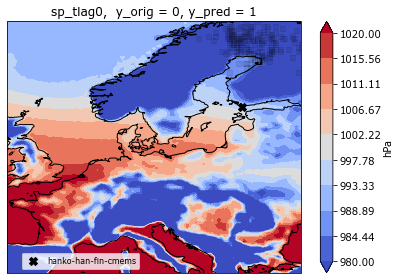

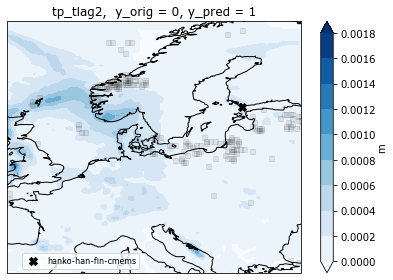

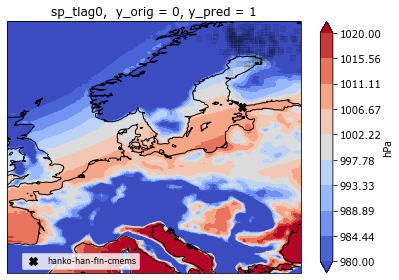

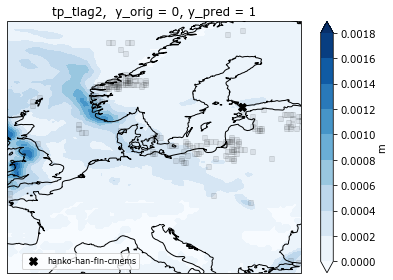

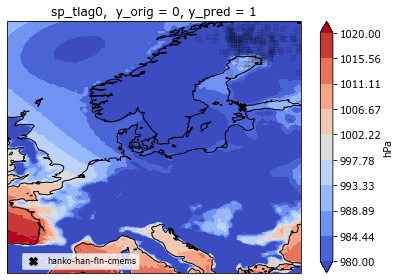

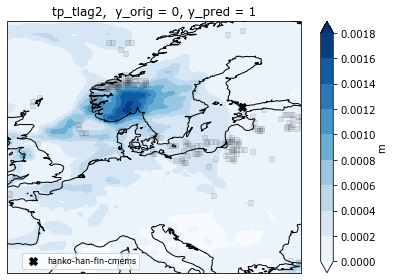

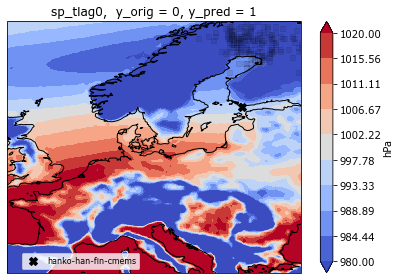

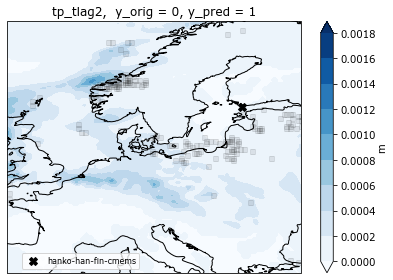

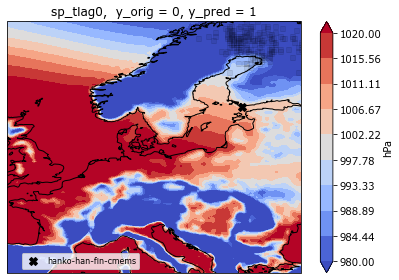

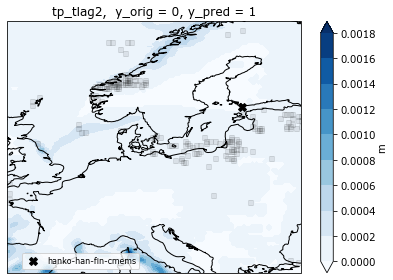

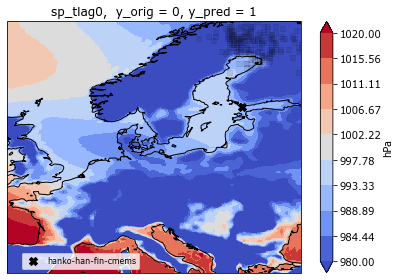

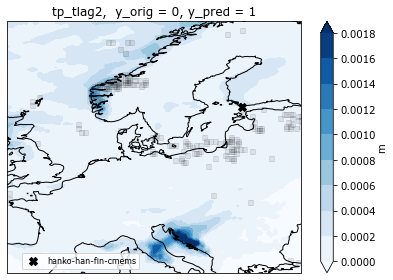

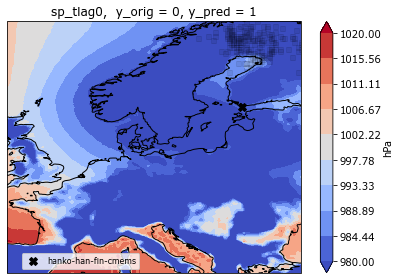

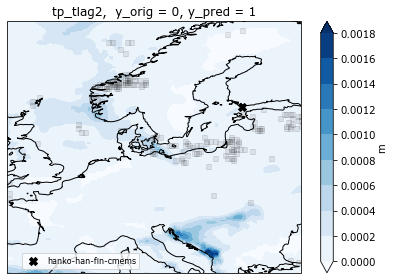

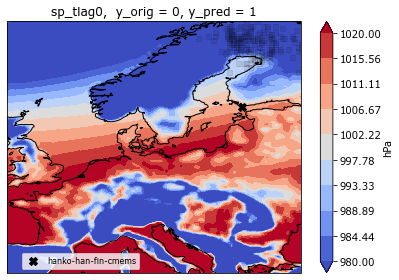

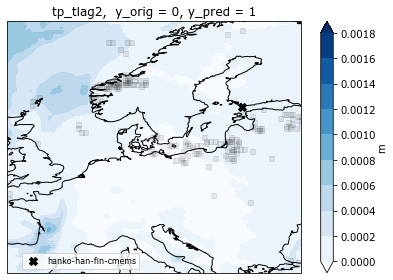

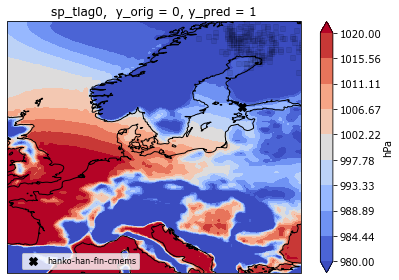

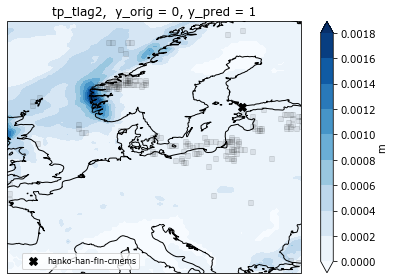

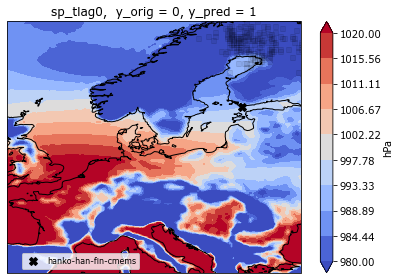

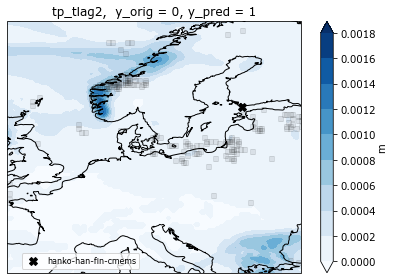

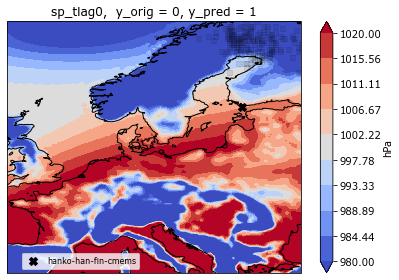

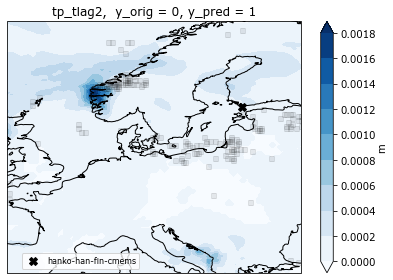

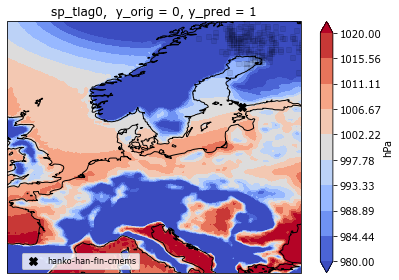

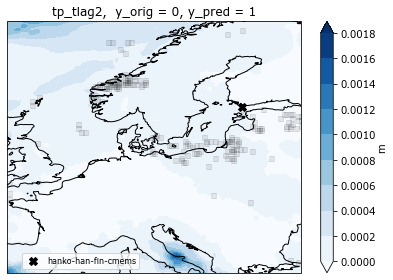

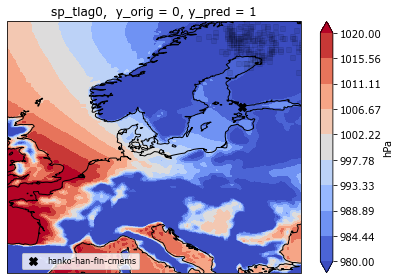

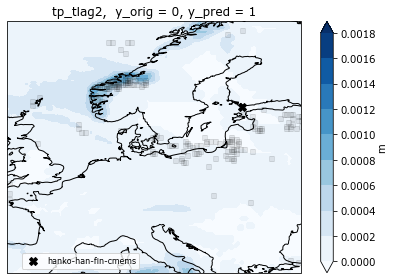

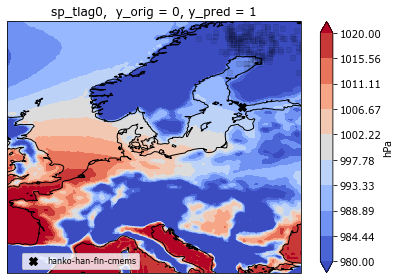

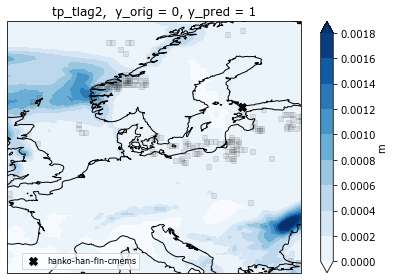

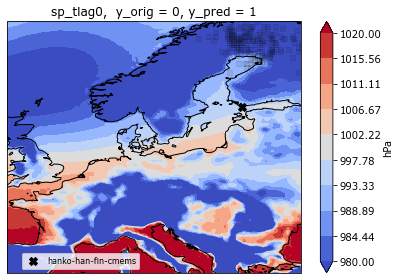

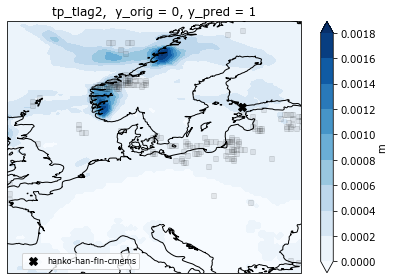

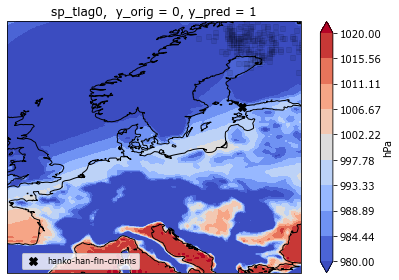

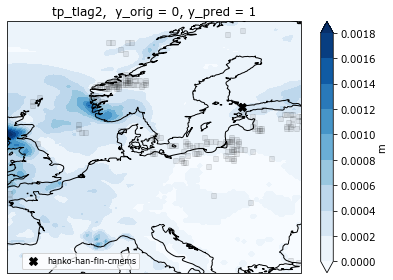

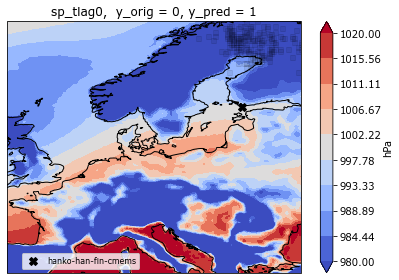

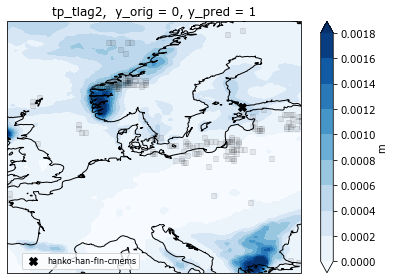

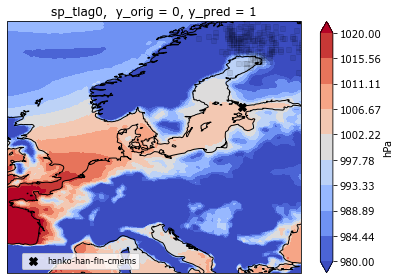

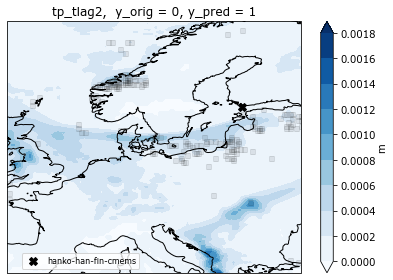

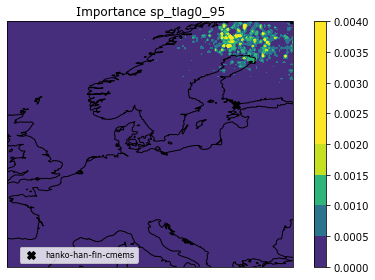

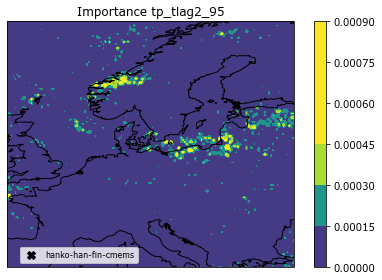

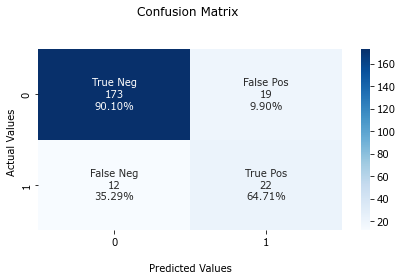

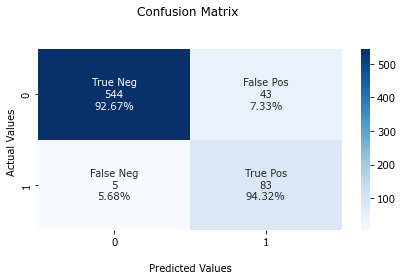

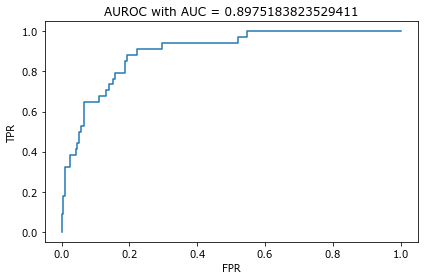

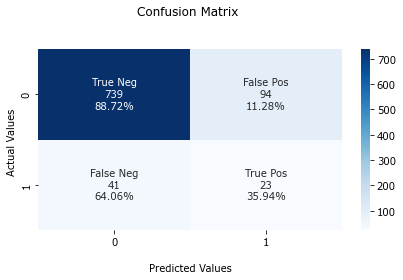

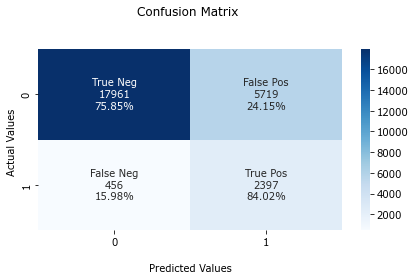

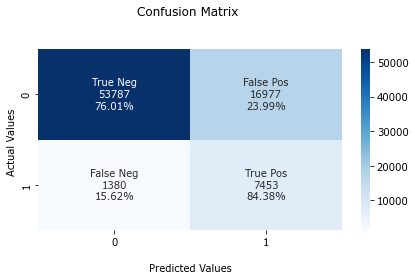

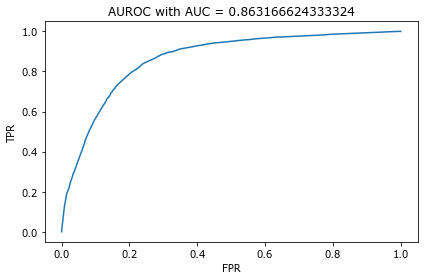

In [6]:
software.run(
model_run, 
run_id, 
season,
station_names, 
detrend_type,
predictors_of_model, 
timelags_of_model, 
models_path, 
percentile, 
clf, 
hparam_grid, 
optimizer, 
k, 
n_iter, 
random_state,
test_size,
is_optimized, 
is_scaled,
is_overlay_importance,
is_station_name,
)

In [5]:
#---
# Shutdown PC
#---
import os
os.system("shutdown /s /t 1") 

0

In [ ]:
# Rf013 tried to simplify random forest. But maxdepth was still at max 10 and results showed possible overfitting.
# RF014 now uses only 1,2,3,4 maxdepth and the rest as default.